In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('C:\\Users\\SRIRAM\\Desktop\\DLCVNLP\\Practice Datasets\\car_sales.csv')

In [4]:
df.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [6]:
df.describe()

Price      Mileage      EngineV         Year
count    4173.000000  4345.000000  4195.000000  4345.000000
mean    19418.746935   161.237284     2.790734  2006.550058
std     25584.242620   105.705797     5.066437     6.719097
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    86.000000     1.800000  2003.000000
50%     11500.000000   155.000000     2.200000  2008.000000
75%     21700.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000

In [7]:
df.shape

(4345, 9)

In [8]:
# Exploring the numeric variables

numerical = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables:\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 4 numerical variables:

The numerical variables are :

 ['Price', 'Mileage', 'EngineV', 'Year']


In [9]:
df[numerical].head()

Price  Mileage  EngineV  Year
0   4200.0      277      2.0  1991
1   7900.0      427      2.9  1999
2  13300.0      358      5.0  2003
3  23000.0      240      4.2  2007
4  18300.0      120      2.0  2011

In [10]:
# Checking Missing values in Numerical Variable
df[numerical].isnull().sum()

Price      172
Mileage      0
EngineV    150
Year         0
dtype: int64

As we can see, there are missing variables in price and engine.

In [11]:
sns.heatmap(df[numerical].isnull(), cbar = False)

In [12]:
# Viewing the distribution of Price variable
f, ax = plt.subplots(figsize = (10, 6))
x = df['Price']
ax = sns.distplot(x, bins = 10, color = 'red')
ax.set_title("Distribution of Price Variable")
plt.show()

In [13]:
# Viewing the distribution of Mileage Variable
f, ax = plt.subplots(figsize = (10, 6))
x = df['Mileage']
ax = sns.distplot(x, bins = 10, color = 'blue')
ax.set_title("Distribution of Mileage variable")
plt.show()

In [14]:
# Viewing the distribution of EngineV variable
f, ax = plt.subplots(figsize = (10, 6))
x = df['EngineV']
ax = sns.distplot(x, bins = 10, color = 'green')
ax.set_title("Distribution of EngineV variable")
plt.show()

In [15]:
#Viewing the distribution of year variable
f, ax = plt.subplots(figsize = (10, 6))
x = df['Year']
ax = sns.distplot(x, bins = 10, color = 'purple')
ax.set_title("Distribution of year variable")
plt.show()

In [16]:
# Finding the correlations
df.corr().style.format("{:.4}").background_gradient(cmap = plt.get_cmap('coolwarm'), axis = 1)


In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
# Price and Milege
b = sns.boxplot(x = 'Price', y = 'Mileage', data = df)
b.axes.set_title('Price and Mileage', font = 10)
b.set_xlabel('Price', font = 10)
b.set_ylabel('Mileage', font = 10)
plt.show()

In [ ]:
# Price and EngineV
b = sns.boxplot(x = 'Price', y = 'EngineV', data = df)
b.axes.set_title('Price and EngineV', font = 10)
b.set_xlabel('Price', font = 10)
b.set_ylabel('EngineV', font = 10)
plt.show()

In [ ]:
# Price and year
b = sns.boxplot(x = 'Price', y = 'Year', data = df)
b.axes.set_title('Price and Year', font = 10)
b.set_xlabel('Price', font = 10)
b.set_ylabel('Year', font = 10)
plt.show()

From these we can see that the price increases with increase in the year and the price decreases when the mileage of the car decreases

In [17]:
# Categorical Variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables:\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 5 categorical variables:

The categorical variables are :

 ['Brand', 'Body', 'Engine Type', 'Registration', 'Model']


In [18]:
df[categorical].head()

Brand       Body Engine Type Registration         Model
0            BMW      sedan      Petrol          yes           320
1  Mercedes-Benz        van      Diesel          yes  Sprinter 212
2  Mercedes-Benz      sedan         Gas          yes         S 500
3           Audi  crossover      Petrol          yes            Q7
4         Toyota  crossover      Petrol          yes         Rav 4

In [19]:
# Frequency distribution of categorical variables
for var in categorical:
    print(df[var].value_counts())

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
Renault          469
Audi             457
Mitsubishi       327
Name: Brand, dtype: int64
sedan        1649
crossover     901
van           675
other         433
vagon         402
hatch         285
Name: Body, dtype: int64
Diesel    2019
Petrol    1559
Gas        613
Other      154
Name: Engine Type, dtype: int64
yes    3947
no      398
Name: Registration, dtype: int64
E-Class    199
A6         172
Vito       171
Kangoo     146
Camry      134
          ... 
S 55         1
4Runner      1
S 420        1
IQ           1
CLK 430      1
Name: Model, Length: 312, dtype: int64


In [20]:
# Percentage of frequency distribution
for var in categorical:
    print(df[var].value_counts() / np.float(len(df)))

Volkswagen       0.215420
Mercedes-Benz    0.211968
BMW              0.159724
Toyota           0.124511
Renault          0.107940
Audi             0.105178
Mitsubishi       0.075259
Name: Brand, dtype: float64
sedan        0.379517
crossover    0.207365
van          0.155351
other        0.099655
vagon        0.092520
hatch        0.065593
Name: Body, dtype: float64
Diesel    0.464672
Petrol    0.358803
Gas       0.141082
Other     0.035443
Name: Engine Type, dtype: float64
yes    0.9084
no     0.0916
Name: Registration, dtype: float64
E-Class    0.045800
A6         0.039586
Vito       0.039356
Kangoo     0.033602
Camry      0.030840
             ...   
S 55       0.000230
4Runner    0.000230
S 420      0.000230
IQ         0.000230
CLK 430    0.000230
Name: Model, Length: 312, dtype: float64


In [21]:
# Checking Missing values in Categorical Variable
df[categorical].isnull().sum()

Brand           0
Body            0
Engine Type     0
Registration    0
Model           0
dtype: int64

There are no missing values in categorical variables

In [ ]:
# Visualizing distribution of price and brand
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = "Price", hue = "Brand", data = df, palette = "Set1")
ax.set_title("Distribution of price and brand")
plt.show()

In [ ]:
# Visualizing distribution of price and body type
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = "Price", hue = "Body", data = df, palette = "Set1")
ax.set_title("Distribution of price and body type")
plt.show()

In [ ]:
# Visualizing distribution of price and engine type
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = "Price", hue = "Engine Type", data = df, palette = "Set1")
ax.set_title("Distribution of price and engine type")
plt.show()

In [ ]:
# Visualizing distribution of price and model
f, ax = plt.subplots(figsize = (10, 8))
ax = sns.countplot(x = "Price", hue = "Model", data = df, palette = "Set1")
ax.set_title("Distribution of price and Model")
plt.show()

In [22]:
# Taking care of the missing values
median = df['Price'].median()
df['Price'].fillna(median, inplace = True)


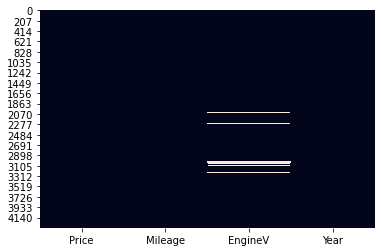

In [23]:
sns.heatmap(df[numerical].isnull(), cbar = False)

In [24]:
# Similarly we can replace the missing values for EngineV
median = df['EngineV'].median()
df['EngineV'].fillna(median, inplace = True)

In [25]:
sns.heatmap(df[numerical].isnull(), cbar = False)

All the missing values has been taken care of.

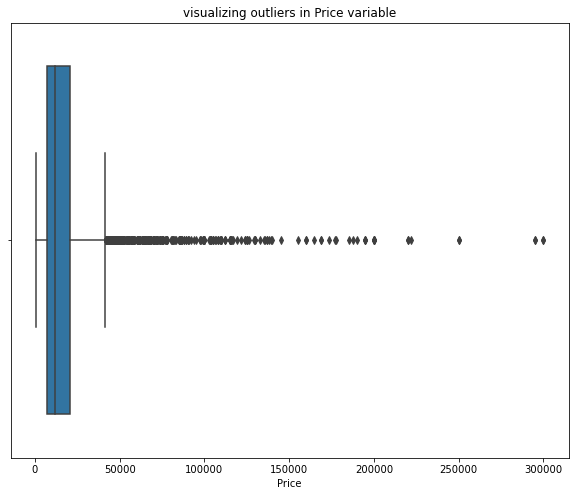

In [26]:
# Deteting outliers in Price variable
f, ax = plt.subplots(figsize = (10, 8))
x = df['Price']
ax = sns.boxplot(x)
ax.set_title("visualizing outliers in Price variable")
plt.show()

In [27]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['Price'] >= Q1 - 1.5 * IQR) & (df['Price'] <= Q3 + 1.5 *IQR)
df.loc[filter]  

Brand    Price       Body  Mileage  EngineV Engine Type  \
0               BMW   4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3              Audi  23000.0  crossover      240      4.2      Petrol   
4            Toyota  18300.0  crossover      120      2.0      Petrol   
...             ...      ...        ...      ...      ...         ...   
4339         Toyota  17900.0      sedan       35      1.6      Petrol   
4341            BMW   6500.0      sedan        1      3.5      Petrol   
4342            BMW   8000.0      sedan      194      2.0      Petrol   
4343         Toyota  14200.0      sedan       31      2.2      Petrol   
4344     Volkswagen  13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4339          yes  2014            Corolla  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[3943 rows x 9 columns]

In [28]:
# Function to remove outlier
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    return df_out

In [29]:
remove_outlier(df, 'Price')

Brand    Price       Body  Mileage  EngineV Engine Type  \
0               BMW   4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3              Audi  23000.0  crossover      240      4.2      Petrol   
4            Toyota  18300.0  crossover      120      2.0      Petrol   
...             ...      ...        ...      ...      ...         ...   
4339         Toyota  17900.0      sedan       35      1.6      Petrol   
4341            BMW   6500.0      sedan        1      3.5      Petrol   
4342            BMW   8000.0      sedan      194      2.0      Petrol   
4343         Toyota  14200.0      sedan       31      2.2      Petrol   
4344     Volkswagen  13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4339          yes  2014            Corolla  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[3943 rows x 9 columns]

In [30]:
sns.boxplot(x = 'Price', data = df, showfliers = False)


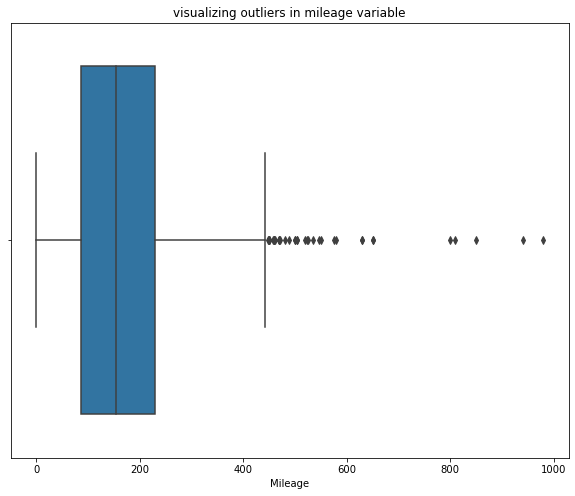

In [31]:
# Visulaize outlier in Mileage variable
f, ax = plt.subplots(figsize = (10, 8))
x = df['Mileage']
ax = sns.boxplot(x)
ax.set_title("visualizing outliers in mileage variable")
plt.show()

In [32]:
remove_outlier(df, 'Mileage')

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      2.2      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[4305 rows x 9 columns]

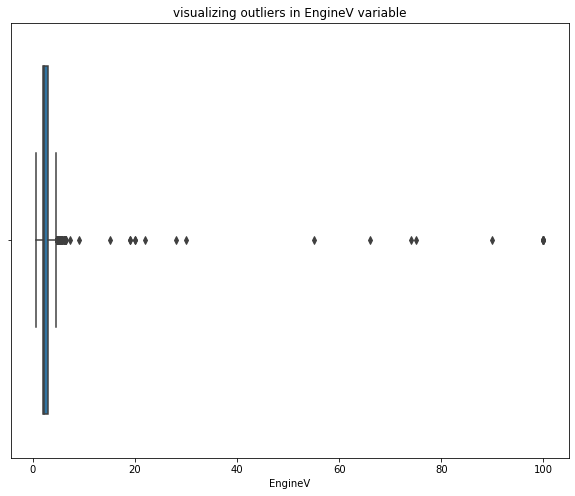

In [33]:
# Visulaize outlier in EngineV variable
f, ax = plt.subplots(figsize = (10, 8))
x = df['EngineV']
ax = sns.boxplot(x)
ax.set_title("visualizing outliers in EngineV variable")
plt.show()

In [34]:
remove_outlier(df, 'EngineV')

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
6               BMW    6100.0      sedan      438      2.0         Gas   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4342            BMW    8000.0      sedan      194      2.0      Petrol   
4343         Toyota   14200.0      sedan       31      2.2      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
6             yes  1997                320  
...           ...   ...                ...  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[4115 rows x 9 columns]

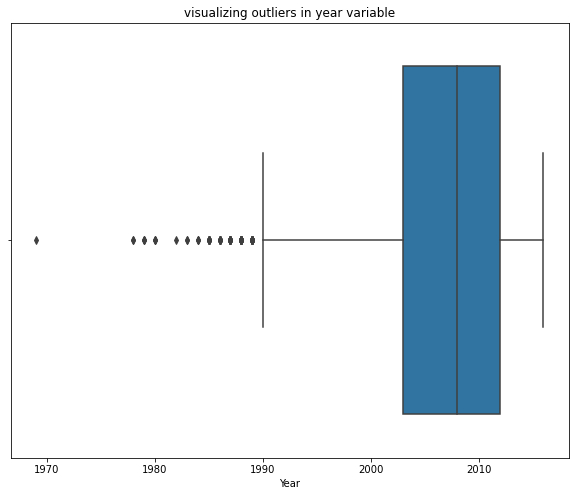

In [35]:
# Visulaize outlier in year variable
f, ax = plt.subplots(figsize = (10, 8))
x = df['Year']
ax = sns.boxplot(x)
ax.set_title("visualizing outliers in year variable")
plt.show()

In [36]:
remove_outlier(df, 'Year')

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
4339         Toyota   17900.0      sedan       35      1.6      Petrol   
4340  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
4341            BMW    6500.0      sedan        1      3.5      Petrol   
4343         Toyota   14200.0      sedan       31      2.2      Petrol   
4344     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4339          yes  2014            Corolla  
4340          yes  2014              S 350  
4341          yes  1999                535  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[4239 rows x 9 columns]

In [37]:
# One Hot Encode Categorical Variable(training data)
lst = ['Brand', 'Body', 'Engine Type', 'Registration', 'Model']
remove = list()
for i in lst:
    if (df[i].dtype == np.str or df[i].dtype == np.object):
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,-1)
        remove.append(i)
df1= df.drop(remove, axis=1)
df1.head()

Price  Mileage  EngineV  Year  Brand_BMW  Brand_Mercedes-Benz  \
0   4200.0      277      2.0  1991          1                   -1   
1   7900.0      427      2.9  1999         -1                    1   
2  13300.0      358      5.0  2003         -1                    1   
3  23000.0      240      4.2  2007         -1                   -1   
4  18300.0      120      2.0  2011         -1                   -1   

   Brand_Audi  Brand_Toyota  Brand_Renault  Brand_Volkswagen  ...  \
0          -1            -1             -1                -1  ...   
1          -1            -1             -1                -1  ...   
2          -1            -1             -1                -1  ...   
3           1            -1             -1                -1  ...   
4          -1             1             -1                -1  ...   

   Model_SL 55 AMG  Model_650  Model_Sprinter 324  Model_Lite Ace  \
0               -1         -1                  -1              -1   
1               -1         -1                  -1              -1   
2               -1         -1                  -1              -1   
3               -1         -1                  -1              -1   
4               -1         -1                  -1              -1   

   Model_4Runner  Model_Sequoia  Model_11  Model_Sprinter 315  Model_Syncro  \
0             -1             -1        -1                  -1            -1   
1             -1             -1        -1                  -1            -1   
2             -1             -1        -1                  -1            -1   
3             -1             -1        -1                  -1            -1   
4             -1             -1        -1                  -1            -1   

   Model_Scion  
0           -1  
1           -1  
2           -1  
3           -1  
4           -1  

[5 rows x 335 columns]

In [38]:
x = df1.drop(['Price'],axis=1)
y = df1[['Price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [39]:
# Modelling
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

<ipython-input-39-dfb756358878>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [40]:
rfr_pred = rfr.predict(X_test)

In [68]:
from sklearn import metrics

In [66]:
# Print the results of MAE
print(metrics.mean_absolute_error(y_test, rfr_pred))

# Print the results of MSE
print(metrics.mean_squared_error(y_test, rfr_pred))

# Print the results of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))


5399.579185200252
259889034.67473915
16121.07424071793


In [71]:
# SVR
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', degree = 3, C = 1.0, gamma = 'auto')
svr.fit(X_train, y_train)

C:\Users\SRIRAM\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(gamma='auto')

In [72]:
svr_pred = svr.predict(X_test)

In [73]:
# Print the results of MAE
print(metrics.mean_absolute_error(y_test, svr_pred))

# Print the results of MSE
print(metrics.mean_squared_error(y_test, svr_pred))

# Print the results of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))


12790.960465994334
770911426.261091
27765.29175537493


In [76]:
# Function to get best score
def get_best_score(model):
    
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
    
    return model.best_score_

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [83]:
rf = RandomForestRegressor()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
                  200,
                  300,
                  400,
                  500,
                  600,
                  700,
                  800,
                  900,
                  1000,
                  1100,
                  1200]}


In [84]:
# Evaluation of Random Search
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = np.sqrt(mean_squared_error(y_test, predictions))
    print('Model Performance')
    print('MSE of: ', errors)
    
    return errors

In [85]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)


best_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
best_random.fit(X_train , y_train)

random_accuracy = evaluate(best_random, X_test, y_test)

print('\n')
print('Base Accuracy: ', base_accuracy)
print('\n')
print('Random Accuracy: ', random_accuracy)
print('Improvement of {:0.2f}%.'.format((random_accuracy - base_accuracy) / base_accuracy))

print('\n')
print('RF_Randomized_Search_CV')
print('\n')




<ipython-input-85-f1492bc8b4b9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(X_train, y_train)


Model Performance
MSE of:  15252.77375451656


<ipython-input-85-f1492bc8b4b9>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_random.fit(X_train , y_train)


Model Performance
MSE of:  16601.389177993467


Base Accuracy:  15252.77375451656


Random Accuracy:  16601.389177993467
Improvement of 0.09%.


RF_Randomized_Search_CV


